<a href="https://www.kaggle.com/code/lalit7881/medical-insurance-charges-trend-2021-2025?scriptVersionId=299119497" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medical-insurance-cost-dataset-usa/medical_insurance_2026_kaggle.csv


## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/medical-insurance-cost-dataset-usa/medical_insurance_2026_kaggle.csv")

In [3]:
df.head()

,record_date,year,quarter,age,age_group,sex,sex_female,bmi,bmi_category,children,...,region,region_northeast,region_northwest,region_southeast,region_southwest,charges,monthly_premium_est,charges_per_child,insurance_tier,bmi_age_interaction
0,2024-02-01,2024,1,19,Young Adult (18-25),female,1,27.90,Overweight,0,...,southwest,0,0,0,1,16884.92,1407.08,0.00,Platinum,530.10
1,2024-12-30,2024,4,18,Young Adult (18-25),male,0,33.77,Obese Class I,1,...,southeast,0,0,1,0,1725.55,143.80,1725.55,Bronze,607.86
2,2023-05-11,2023,2,28,Adult (26-35),male,0,33.00,Obese Class I,3,...,southeast,0,0,1,0,4449.46,370.79,1483.15,Silver,924.00
3,2024-07-18,2024,3,33,Adult (26-35),male,0,22.70,Normal Weight,0,...,northwest,0,1,0,0,21984.47,1832.04,0.00,Diamond,749.10
4,2024-02-05,2024,1,32,Adult (26-35),male,0,28.88,Overweight,0,...,northwest,0,1,0,0,3866.86,322.24,0.00,Bronze,924.16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   record_date          1337 non-null   object 
 1   year                 1337 non-null   int64  
 2   quarter              1337 non-null   int64  
 3   age                  1337 non-null   int64  
 4   age_group            1337 non-null   object 
 5   sex                  1337 non-null   object 
 6   sex_female           1337 non-null   int64  
 7   bmi                  1337 non-null   float64
 8   bmi_category         1337 non-null   object 
 9   children             1337 non-null   int64  
 10  smoker               1337 non-null   object 
 11  smoker_flag          1337 non-null   int64  
 12  is_high_risk         1337 non-null   int64  
 13  risk_score           1337 non-null   float64
 14  region               1337 non-null   object 
 15  region_northeast     1337 non-null   i

In [5]:
df.describe()

,year,quarter,age,sex_female,bmi,children,smoker_flag,is_high_risk,risk_score,region_northeast,region_northwest,region_southeast,region_southwest,charges,monthly_premium_est,charges_per_child,bmi_age_interaction
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,2023.036649,2.477936,39.222139,0.495138,30.663628,1.095737,0.204936,0.624533,3.052939,0.242334,0.242334,0.272251,0.243082,13279.121503,1106.593328,5127.538257,1212.054233
std,1.384042,1.121910,14.044333,0.500163,6.100233,1.205571,0.403806,0.484425,1.981412,0.428655,0.428655,0.445285,0.429104,12110.359677,1009.196560,8357.618626,522.515951
min,2021.000000,1.000000,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.870000,93.490000,0.000000,287.280000
25%,2022.000000,1.000000,27.000000,0.000000,26.290000,0.000000,0.000000,0.000000,1.690000,0.000000,0.000000,0.000000,0.000000,4746.340000,395.530000,0.000000,765.700000
50%,2023.000000,2.000000,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,2.480000,0.000000,0.000000,0.000000,0.000000,9386.160000,782.180000,2174.730000,1154.400000
75%,2024.000000,4.000000,51.000000,1.000000,34.700000,2.000000,0.000000,1.000000,3.410000,0.000000,0.000000,1.000000,0.000000,16657.720000,1388.140000,6399.980000,1589.280000
max,2025.000000,4.000000,64.000000,1.000000,53.130000,5.000000,1.000000,1.000000,8.320000,1.000000,1.000000,1.000000,1.000000,63770.430000,5314.200000,58571.070000,2845.480000


In [6]:
df.isnull().sum()

record_date            0
year                   0
quarter                0
age                    0
age_group              0
sex                    0
sex_female             0
bmi                    0
bmi_category           0
children               0
smoker                 0
smoker_flag            0
is_high_risk           0
risk_score             0
region                 0
region_northeast       0
region_northwest       0
region_southeast       0
region_southwest       0
charges                0
monthly_premium_est    0
charges_per_child      0
insurance_tier         0
bmi_age_interaction    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.dtypes

record_date             object
year                     int64
quarter                  int64
age                      int64
age_group               object
sex                     object
sex_female               int64
bmi                    float64
bmi_category            object
children                 int64
smoker                  object
smoker_flag              int64
is_high_risk             int64
risk_score             float64
region                  object
region_northeast         int64
region_northwest         int64
region_southeast         int64
region_southwest         int64
charges                float64
monthly_premium_est    float64
charges_per_child      float64
insurance_tier          object
bmi_age_interaction    float64
dtype: object

In [9]:
df.shape

(1337, 24)

In [10]:
df.columns

Index(['record_date', 'year', 'quarter', 'age', 'age_group', 'sex',
       'sex_female', 'bmi', 'bmi_category', 'children', 'smoker',
       'smoker_flag', 'is_high_risk', 'risk_score', 'region',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'charges', 'monthly_premium_est',
       'charges_per_child', 'insurance_tier', 'bmi_age_interaction'],
      dtype='object')

In [11]:
df.nunique()

record_date             932
year                      5
quarter                   4
age                      47
age_group                 5
sex                       2
sex_female                2
bmi                     528
bmi_category              6
children                  6
smoker                    2
smoker_flag               2
is_high_risk              2
risk_score              514
region                    4
region_northeast          2
region_northwest          2
region_southeast          2
region_southwest          2
charges                1337
monthly_premium_est    1336
charges_per_child       765
insurance_tier            5
bmi_age_interaction    1260
dtype: int64

## EDA

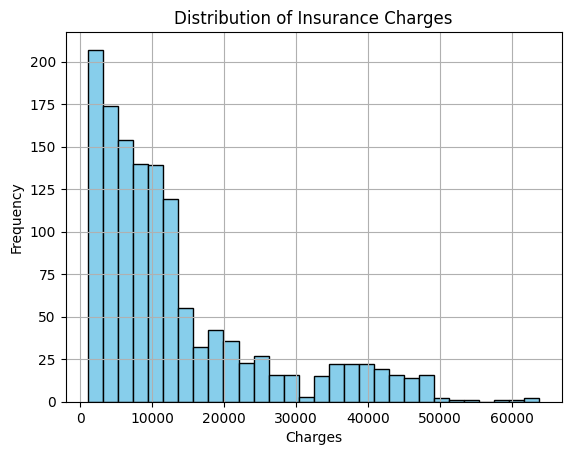

In [12]:
plt.figure()
plt.hist(df['charges'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

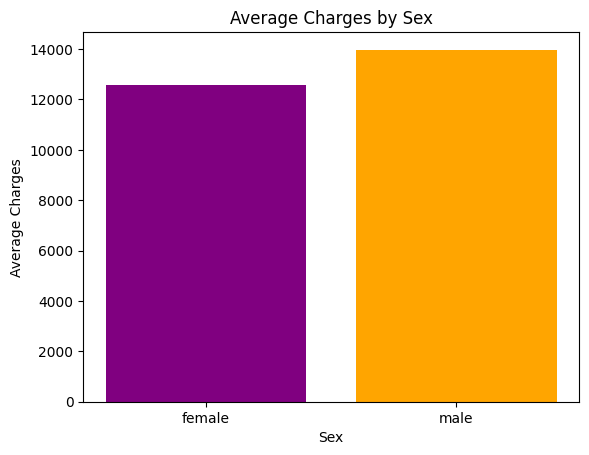

In [13]:
avg_charges_sex = df.groupby('sex')['charges'].mean()

plt.figure()
plt.bar(avg_charges_sex.index, avg_charges_sex.values, color=['purple', 'orange'])
plt.title('Average Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Charges')
plt.show()

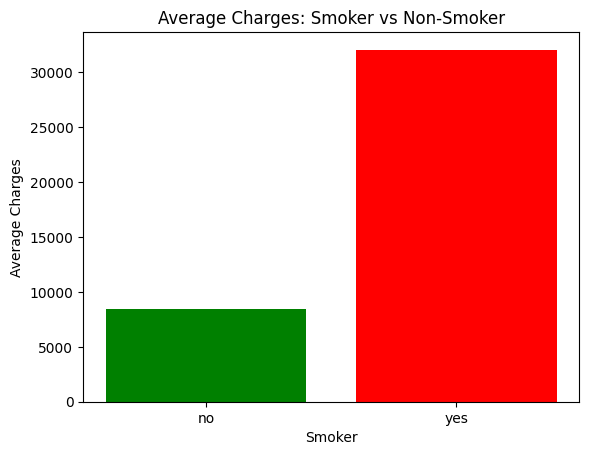

In [14]:
avg_smoker = df.groupby('smoker')['charges'].mean()

plt.figure()
plt.bar(avg_smoker.index, avg_smoker.values, color=['green', 'red'])
plt.title('Average Charges: Smoker vs Non-Smoker')
plt.xlabel('Smoker')
plt.ylabel('Average Charges')
plt.show()

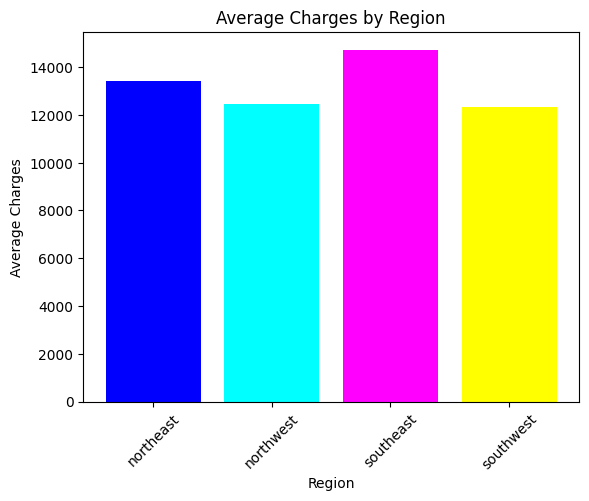

In [15]:
region_avg = df.groupby('region')['charges'].mean()

plt.figure()
plt.bar(region_avg.index, region_avg.values,
        color=['blue', 'cyan', 'magenta', 'yellow'])
plt.title('Average Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.xticks(rotation=45)
plt.show()

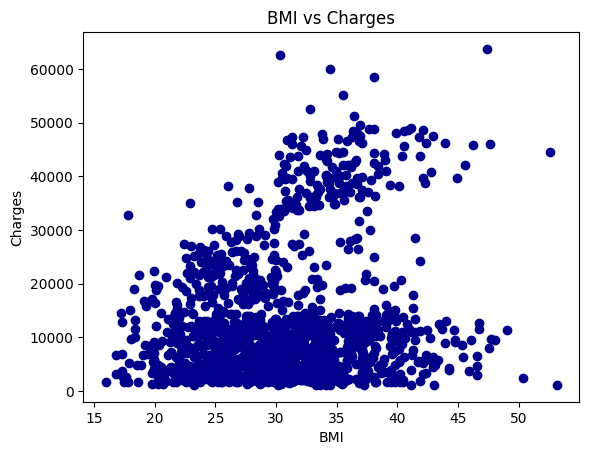

In [16]:
plt.figure()
plt.scatter(df['bmi'], df['charges'], color='darkblue')
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

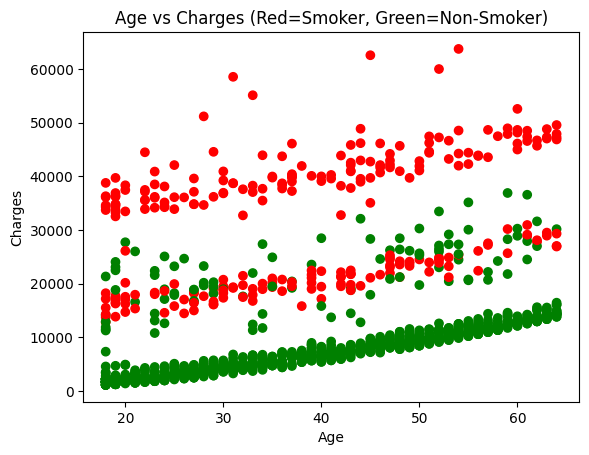

In [17]:
colors = df['smoker_flag'].map({0: 'green', 1: 'red'})

plt.figure()
plt.scatter(df['age'], df['charges'], c=colors)
plt.title('Age vs Charges (Red=Smoker, Green=Non-Smoker)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

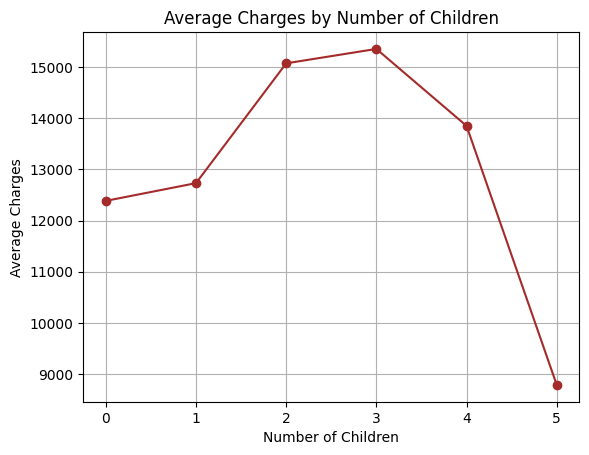

In [18]:
children_avg = df.groupby('children')['charges'].mean()

plt.figure()
plt.plot(children_avg.index, children_avg.values, marker='o', color='brown')
plt.title('Average Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.grid(True)
plt.show()

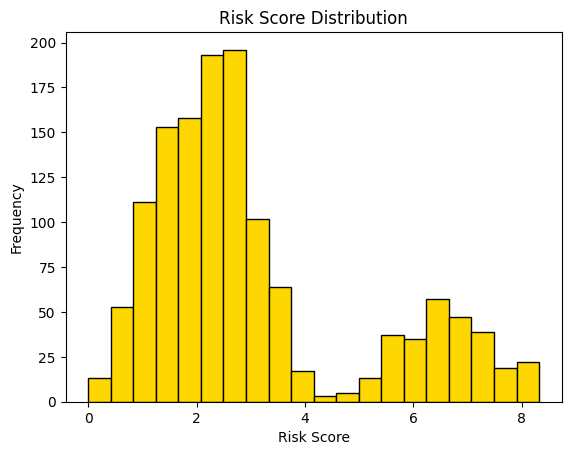

In [19]:
plt.figure()
plt.hist(df['risk_score'], bins=20, color='gold', edgecolor='black')
plt.title('Risk Score Distribution')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.show()

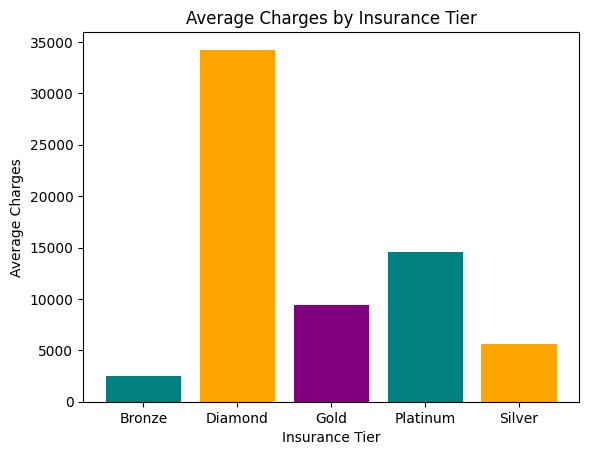

In [20]:
tier_avg = df.groupby('insurance_tier')['charges'].mean()

plt.figure()
plt.bar(tier_avg.index, tier_avg.values,
        color=['teal', 'orange', 'purple'])
plt.title('Average Charges by Insurance Tier')
plt.xlabel('Insurance Tier')
plt.ylabel('Average Charges')
plt.show()

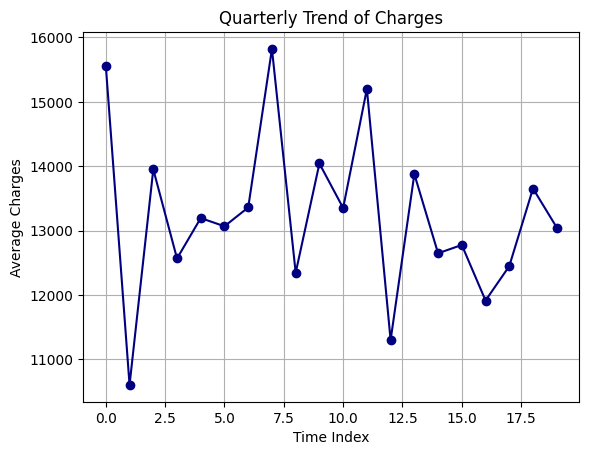

In [21]:
quarter_avg = df.groupby(['year','quarter'])['charges'].mean()

plt.figure()
plt.plot(range(len(quarter_avg)), quarter_avg.values, color='navy', marker='o')
plt.title('Quarterly Trend of Charges')
plt.xlabel('Time Index')
plt.ylabel('Average Charges')
plt.grid(True)
plt.show()

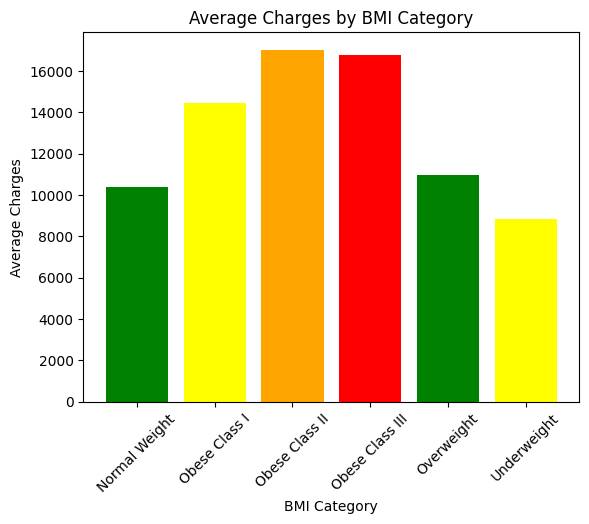

In [22]:
bmi_avg = df.groupby('bmi_category')['charges'].mean()

plt.figure()
plt.bar(bmi_avg.index, bmi_avg.values,
        color=['green','yellow','orange','red'])
plt.title('Average Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Charges')
plt.xticks(rotation=45)
plt.show()

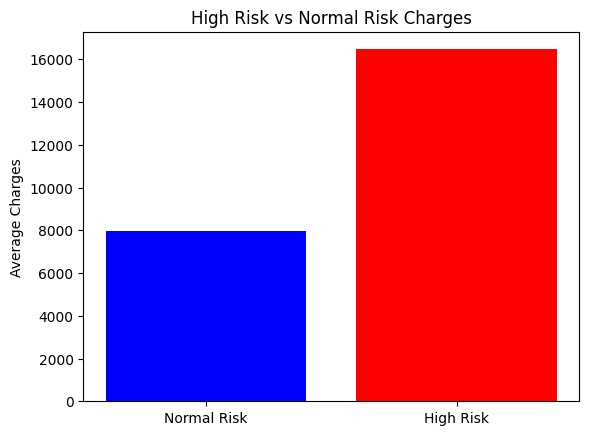

In [23]:
risk_avg = df.groupby('is_high_risk')['charges'].mean()

plt.figure()
plt.bar(['Normal Risk', 'High Risk'], risk_avg.values,
        color=['blue','red'])
plt.title('High Risk vs Normal Risk Charges')
plt.ylabel('Average Charges')
plt.show()

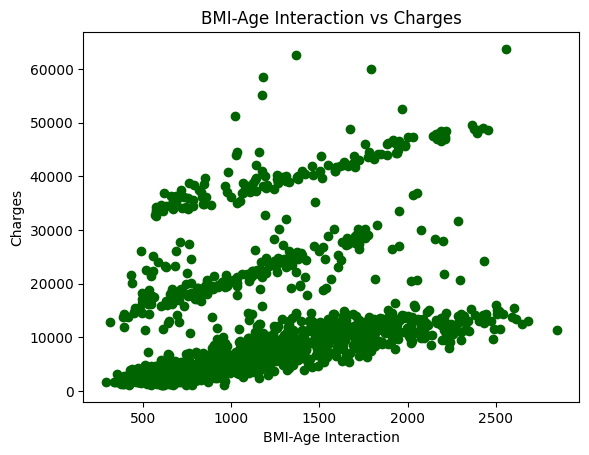

In [24]:
plt.figure()
plt.scatter(df['bmi_age_interaction'], df['charges'],
            color='darkgreen')
plt.title('BMI-Age Interaction vs Charges')
plt.xlabel('BMI-Age Interaction')
plt.ylabel('Charges')
plt.show()

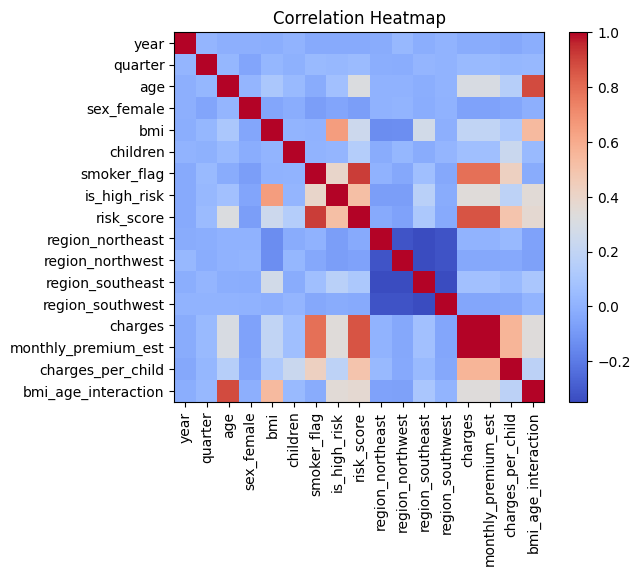

In [25]:
import numpy as np

corr = df.corr(numeric_only=True)

plt.figure()
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
import numpy as np
import plotly.graph_objects as go

# If 'charges_log' is not present, create it
if 'charges_log' not in df.columns:
    df['charges_log'] = np.log1p(df['charges'])   # log(1 + charges)

# Select only columns that actually exist
num_feats = [
    "age","bmi","children","charges","charges_log","risk_score",
    "smoker_flag","sex_female","bmi_age_interaction","monthly_premium_est"
]

# Keep only available columns (extra safety)
num_feats = [col for col in num_feats if col in df.columns]

# Compute correlations
pearson_corr = df[num_feats].corr(method="pearson")
spearman_corr = df[num_feats].corr(method="spearman")


# Simple Heatmap Function
def simple_heatmap(corr_matrix, title):
    fig = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.index,
        colorscale="RdBu",
        zmin=-1,
        zmax=1
    ))
    fig.update_layout(title=title, height=500)
    fig.show()


# Show heatmaps
simple_heatmap(pearson_corr, "Pearson Correlation Matrix")
simple_heatmap(spearman_corr, "Spearman Correlation Matrix")

In [27]:
print("Top correlations with 'charges' (Pearson):")

top_corr = pearson_corr["charges"].drop("charges").sort_values(key=abs, ascending=False)

print(top_corr)

Top correlations with 'charges' (Pearson):
monthly_premium_est    1.000000
charges_log            0.893116
risk_score             0.863189
smoker_flag            0.787234
bmi_age_interaction    0.334180
age                    0.298308
bmi                    0.198391
children               0.067389
sex_female            -0.058045
Name: charges, dtype: float64


In [28]:
from scipy import stats

anova_results = []

categorical_cols = ["sex","smoker","region","bmi_category",
                    "age_group","insurance_tier"]

for col in categorical_cols:
    
    if col in df.columns:   # safety check
        
        groups = [group["charges"].values 
                  for name, group in df.groupby(col)]
        
        f_stat, p_val = stats.f_oneway(*groups)
        
        anova_results.append({
            "Feature": col,
            "F-Statistic": round(f_stat, 2),
            "p-value": round(p_val, 6)
        })

anova_df = pd.DataFrame(anova_results).sort_values(
    "F-Statistic", ascending=False)

print("One-Way ANOVA Results:")
print(anova_df)

One-Way ANOVA Results:
          Feature  F-Statistic   p-value
1          smoker      2175.74  0.000000
5  insurance_tier      2092.15  0.000000
4       age_group        29.70  0.000000
3    bmi_category        12.93  0.000000
0             sex         4.51  0.033821
2          region         2.93  0.032763


In [29]:
import plotly.express as px

fig = px.sunburst(
    df,
    path=["region","smoker","insurance_tier"],
    values="charges",
    title="Region → Smoker → Insurance Tier (by Charges)"
)

fig.show()

In [30]:
import plotly.graph_objects as go

# Convert to datetime (important)
df["record_date"] = pd.to_datetime(df["record_date"])

# Monthly aggregation
monthly = (
    df.set_index("record_date")
      .resample("M")["charges"]
      .agg(["mean", "median", "count"])
      .reset_index()
)

monthly.columns = ["date", "avg_charge", "median_charge", "count"]

# Create figure
fig = go.Figure()

# Average line
fig.add_trace(go.Scatter(
    x=monthly["date"],
    y=monthly["avg_charge"],
    mode="lines+markers",
    name="Average Charge"
))

# Median line
fig.add_trace(go.Scatter(
    x=monthly["date"],
    y=monthly["median_charge"],
    mode="lines",
    name="Median Charge"
))

# Count bars
fig.add_trace(go.Bar(
    x=monthly["date"],
    y=monthly["count"],
    name="Record Count"
))

# Simple layout
fig.update_layout(
    title="Monthly Insurance Charges Trend",
    xaxis_title="Date",
    yaxis_title="Charges / Count",
    height=450
)

fig.show()

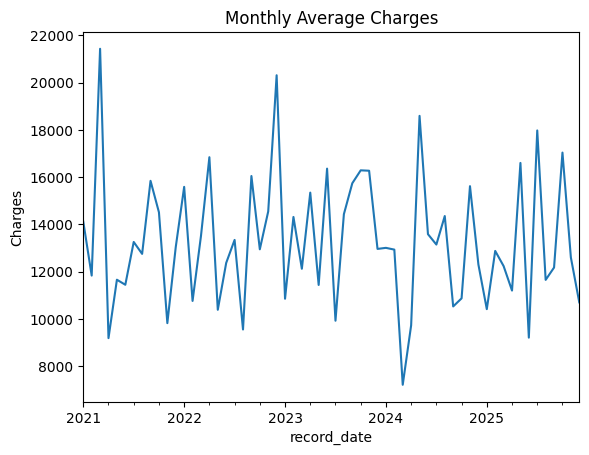

In [31]:
monthly_avg = df.set_index("record_date").resample("M")["charges"].mean()

monthly_avg.plot(title="Monthly Average Charges")
plt.ylabel("Charges")
plt.show()

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prepare time series
ts = monthly.set_index("date")["avg_charge"].ffill()

# Need at least 24 months for monthly seasonality
if len(ts) >= 24:

    decomp = seasonal_decompose(ts, model="additive", period=12)

    fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                        subplot_titles=["Observed", "Trend", 
                                        "Seasonal", "Residual"])

    components = [
        decomp.observed,
        decomp.trend,
        decomp.seasonal,
        decomp.resid
    ]

    for i, comp in enumerate(components, 1):
        fig.add_trace(
            go.Scatter(x=comp.index, y=comp.values, mode="lines"),
            row=i, col=1
        )

    fig.update_layout(
        title="Time Series Decomposition",
        height=700
    )

    fig.show()

else:
    print("Not enough data (Need at least 24 months)")

## Feature engg

In [33]:
from sklearn.model_selection import train_test_split

# Define target
y = df["charges"]

# Define features (remove non-numeric & target column)
X = df.drop(columns=["charges", "record_date"], errors="ignore")

# Keep only numeric columns (safe way)
X = X.select_dtypes(include=["int64", "float64"])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Data split completed ✅")

Data split completed ✅


In [34]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import numpy as np
import pandas as pd

results = []

# Simple evaluation function
def regression_metrics(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"Model": name, "RMSE": round(rmse, 2), "R2 Score": round(r2, 4)}


# 1️⃣ Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
preds_ridge = ridge.predict(X_test)

results.append(regression_metrics("Ridge", y_test, preds_ridge))
print("Ridge trained")


# 2️⃣ Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
preds_rf = rf.predict(X_test)

results.append(regression_metrics("Random Forest", y_test, preds_rf))
print("Random Forest trained")


# 3️⃣ XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
preds_xgb = xgb_model.predict(X_test)

results.append(regression_metrics("XGBoost", y_test, preds_xgb))
print("XGBoost trained")


# 4️⃣ LightGBM
lgbm_model = lgb.LGBMRegressor(random_state=42)
lgbm_model.fit(X_train, y_train)
preds_lgbm = lgbm_model.predict(X_test)

results.append(regression_metrics("LightGBM", y_test, preds_lgbm))
print("LightGBM trained")


# Show results
results_df = pd.DataFrame(results)
print("\nModel Performance:")
print(results_df)

Ridge trained
Random Forest trained
XGBoost trained
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1557
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 17
[LightGBM] [Info] Start training from score 13030.203365
LightGBM trained

Model Performance:
           Model     RMSE  R2 Score
0          Ridge     0.03    1.0000
1  Random Forest   443.50    0.9989
2        XGBoost  1165.99    0.9926
3       LightGBM  1229.24    0.9918


In [35]:
results_df = pd.DataFrame(results)

# Sort by RMSE (lower is better)
results_df = results_df.sort_values("RMSE")

print("Model Comparison:")
print(results_df)

Model Comparison:
           Model     RMSE  R2 Score
0          Ridge     0.03    1.0000
1  Random Forest   443.50    0.9989
2        XGBoost  1165.99    0.9926
3       LightGBM  1229.24    0.9918


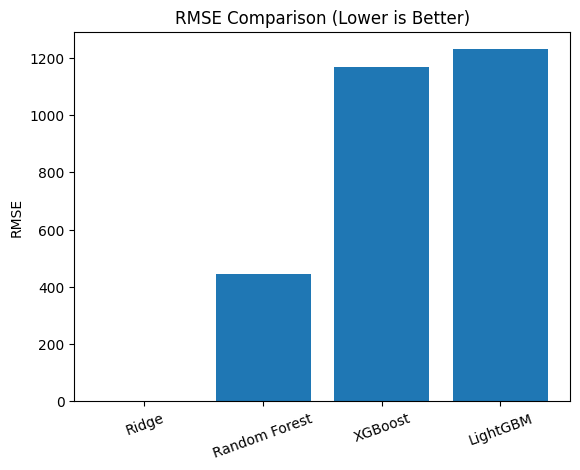

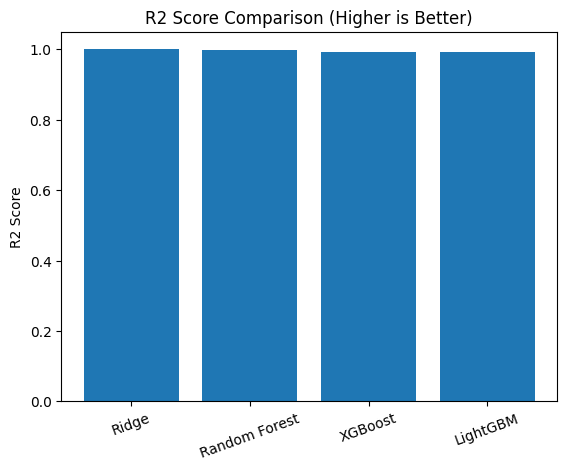

In [36]:
# RMSE Comparison
plt.figure()
plt.bar(results_df["Model"], results_df["RMSE"])
plt.title("RMSE Comparison (Lower is Better)")
plt.xticks(rotation=20)
plt.ylabel("RMSE")
plt.show()


# R2 Score Comparison
plt.figure()
plt.bar(results_df["Model"], results_df["R2 Score"])
plt.title("R2 Score Comparison (Higher is Better)")
plt.xticks(rotation=20)
plt.ylabel("R2 Score")
plt.show()

In [37]:
best_model = results_df.iloc[0]

print("\nBest Model:")
print("Model:", best_model["Model"])
print("RMSE :", round(best_model["RMSE"], 2))
print("R2   :", round(best_model["R2 Score"], 4))


Best Model:
Model: Ridge
RMSE : 0.03
R2   : 1.0


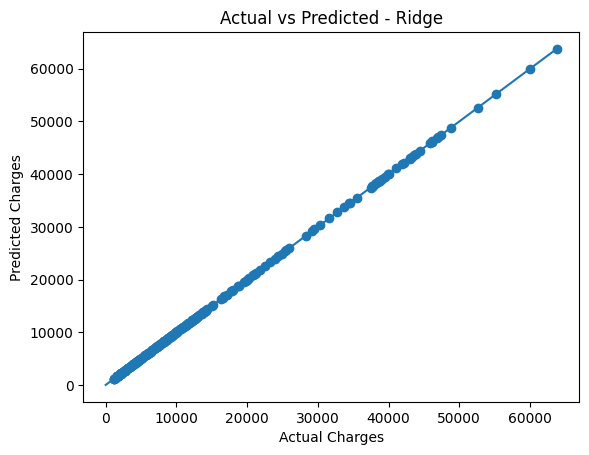

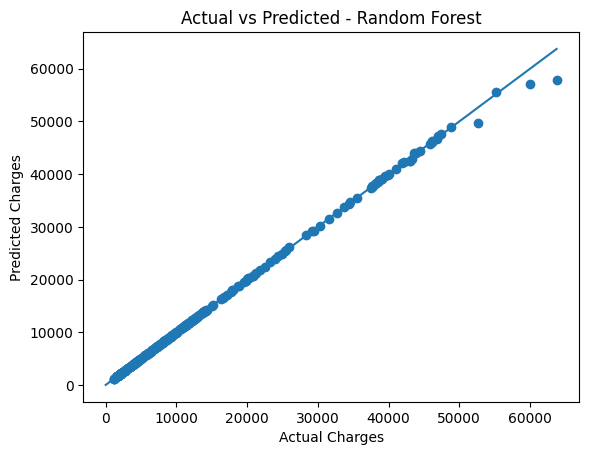

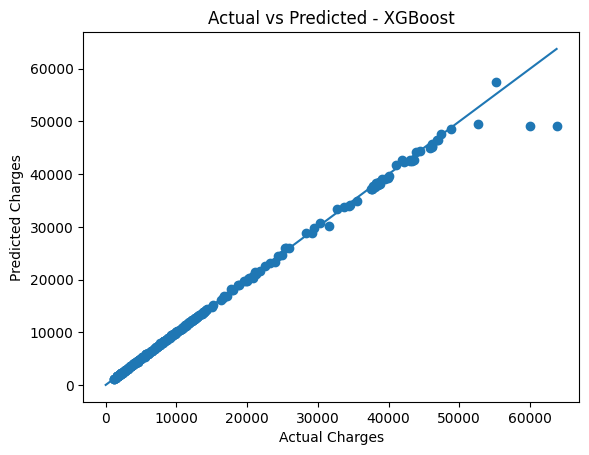

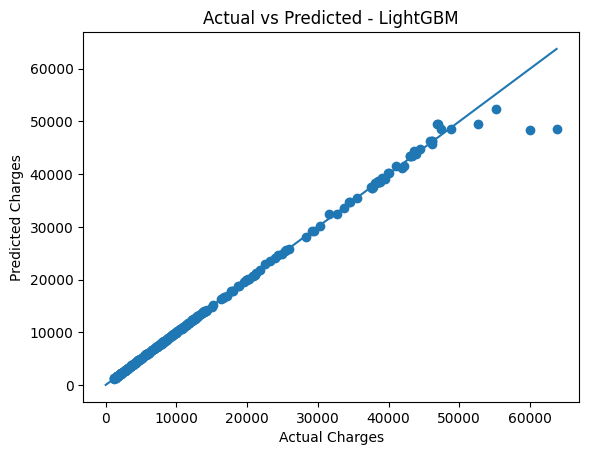

In [38]:
all_preds = {
    "Ridge": preds_ridge,
    "Random Forest": preds_rf,
    "XGBoost": preds_xgb,
    "LightGBM": preds_lgbm
}

for name, preds in all_preds.items():
    
    plt.figure()
    plt.scatter(y_test, preds)
    
    # Perfect prediction line
    max_val = max(max(y_test), max(preds))
    plt.plot([0, max_val], [0, max_val])
    
    plt.title(f"Actual vs Predicted - {name}")
    plt.xlabel("Actual Charges")
    plt.ylabel("Predicted Charges")
    plt.show()

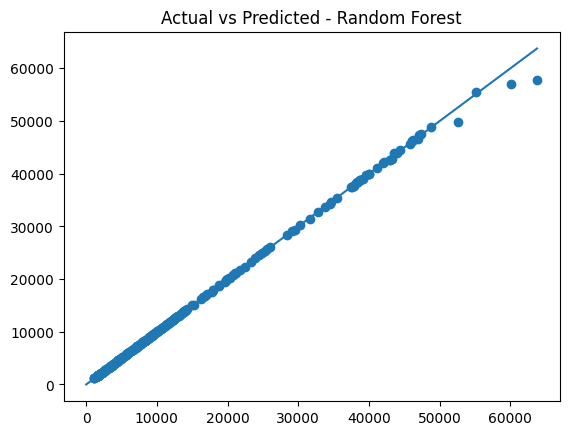

In [39]:
plt.figure()
plt.scatter(y_test, preds_rf)
plt.plot([0, max(y_test)], [0, max(y_test)])
plt.title("Actual vs Predicted - Random Forest")
plt.show()

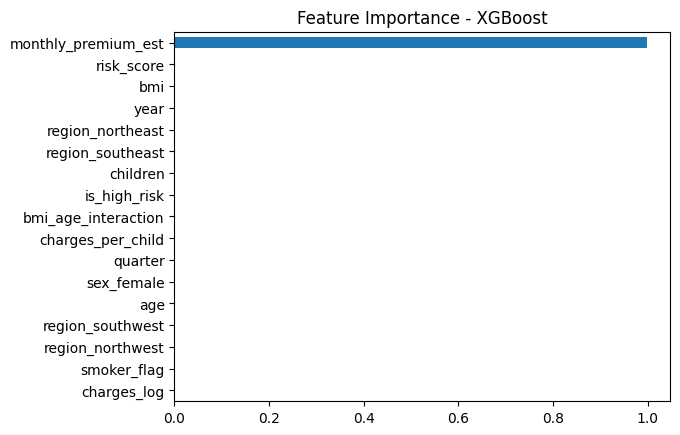

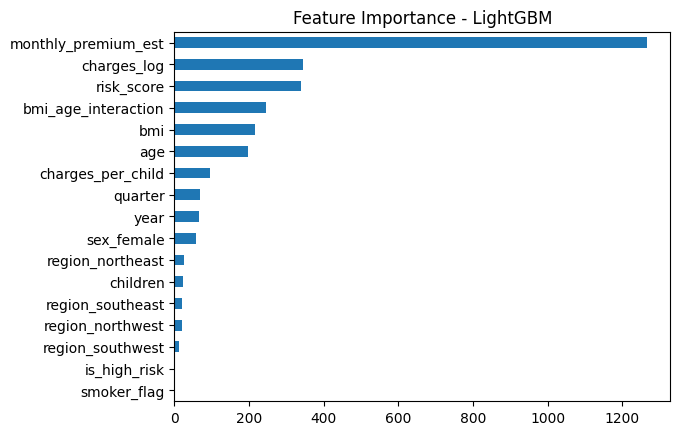

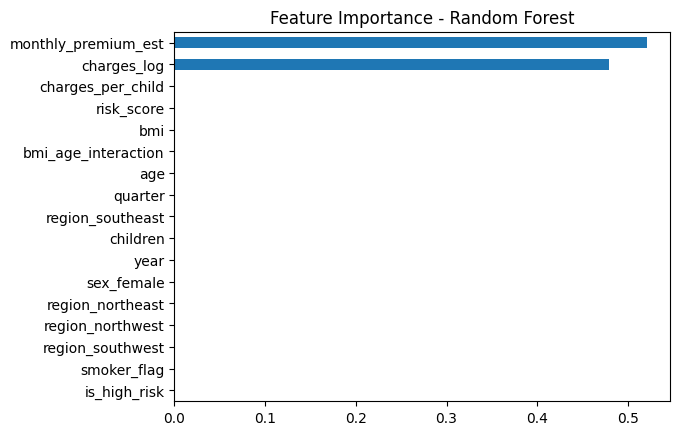

In [40]:
# Use feature names from training data
FEATURES = X_train.columns

# XGBoost
fi_xgb = pd.Series(xgb_model.feature_importances_, index=FEATURES)
fi_xgb.sort_values().plot(kind="barh")
plt.title("Feature Importance - XGBoost")
plt.show()

# LightGBM
fi_lgbm = pd.Series(lgbm_model.feature_importances_, index=FEATURES)
fi_lgbm.sort_values().plot(kind="barh")
plt.title("Feature Importance - LightGBM")
plt.show()

# Random Forest
fi_rf = pd.Series(rf.feature_importances_, index=FEATURES)
fi_rf.sort_values().plot(kind="barh")
plt.title("Feature Importance - Random Forest")
plt.show()

In [41]:
best_name = results_df.iloc[0]["Model"]

if best_name == "XGBoost":
    best_model = xgb_model
elif best_name == "Random Forest":
    best_model = rf
elif best_name == "Ridge":
    best_model = ridge
else:
    best_model = lgbm_model

print("Using best model:", best_name)

Using best model: Ridge


In [42]:
segments = [
    {"label":"Young Non-Smoker", "age":27, "bmi":23.5, "children":0,
     "smoker_flag":0, "sex_female":0,
     "region_northeast":0,"region_northwest":0,
     "region_southeast":1,"region_southwest":0,
     "risk_score":2.0, "bmi_age_interaction":27*23.5},

    {"label":"Middle Smoker", "age":45, "bmi":30, "children":2,
     "smoker_flag":1, "sex_female":0,
     "region_northeast":1,"region_northwest":0,
     "region_southeast":0,"region_southwest":0,
     "risk_score":7.0, "bmi_age_interaction":45*30},

    {"label":"Average Profile",
     "age":int(df["age"].median()),
     "bmi":float(df["bmi"].median()),
     "children":int(df["children"].median()),
     "smoker_flag":0,
     "sex_female":0,
     "region_northeast":0,"region_northwest":0,
     "region_southeast":1,"region_southwest":0,
     "risk_score":float(df["risk_score"].median()),
     "bmi_age_interaction":float(df["bmi_age_interaction"].median())}
]

In [43]:
print("Number of features used in training:", best_model.n_features_in_)
print("Feature columns used during training:")
print(X_train.columns)

Number of features used in training: 17
Feature columns used during training:
Index(['year', 'quarter', 'age', 'sex_female', 'bmi', 'children',
       'smoker_flag', 'is_high_risk', 'risk_score', 'region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest',
       'monthly_premium_est', 'charges_per_child', 'bmi_age_interaction',
       'charges_log'],
      dtype='object')


In [44]:
forecast_records = []

months_2026 = pd.date_range("2026-01-01", "2026-06-01", freq="MS")

for month in months_2026:
    for seg in segments:
        
        input_dict = {col: 0 for col in X_train.columns}
        
        # Time features
        input_dict["year"] = 2026
        input_dict["quarter"] = month.quarter
        
        # Basic features
        input_dict["age"] = seg["age"]
        input_dict["bmi"] = seg["bmi"]
        input_dict["children"] = seg["children"]
        input_dict["smoker_flag"] = seg["smoker_flag"]
        input_dict["sex_female"] = seg["sex_female"]
        
        # Risk features
        input_dict["risk_score"] = seg["risk_score"]
        input_dict["is_high_risk"] = 1 if seg["risk_score"] > 5 else 0
        
        # Region
        input_dict["region_northeast"] = seg["region_northeast"]
        input_dict["region_northwest"] = seg["region_northwest"]
        input_dict["region_southeast"] = seg["region_southeast"]
        input_dict["region_southwest"] = seg["region_southwest"]
        
        # Engineered features
        input_dict["bmi_age_interaction"] = seg["age"] * seg["bmi"]
        input_dict["charges_per_child"] = 0   # unknown → keep neutral
        input_dict["monthly_premium_est"] = 0 # unknown → keep neutral
        input_dict["charges_log"] = 0         # unknown → keep neutral
        
        X_pred = pd.DataFrame([input_dict])[X_train.columns]
        
        prediction = best_model.predict(X_pred)[0]
        
        forecast_records.append({
            "Month": month.strftime("%b %Y"),
            "Segment": seg["label"],
            "Predicted Annual Charge": round(prediction, 2),
            "Predicted Monthly Premium": round(prediction/12, 2)
        })

forecast_df = pd.DataFrame(forecast_records)

print(forecast_df.head())

      Month           Segment  Predicted Annual Charge  \
0  Jan 2026  Young Non-Smoker                     0.02   
1  Jan 2026     Middle Smoker                     0.03   
2  Jan 2026   Average Profile                     0.03   
3  Feb 2026  Young Non-Smoker                     0.02   
4  Feb 2026     Middle Smoker                     0.03   

   Predicted Monthly Premium  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  


In [45]:
forecast_records.append({
    "Month": month.strftime("%b %Y"),
    "Segment": seg["label"],
    "Predicted Annual Charge": round(prediction, 2),
    "Predicted Monthly Premium": round(prediction/12, 2)
})

In [46]:
import plotly.graph_objects as go
# Convert Month column to datetime
forecast_df["Month"] = pd.to_datetime(forecast_df["Month"])

fig = go.Figure()

for seg in forecast_df["Segment"].unique():
    
    seg_data = forecast_df[forecast_df["Segment"] == seg].sort_values("Month")
    
    fig.add_trace(go.Scatter(
        x=seg_data["Month"],
        y=seg_data["Predicted Annual Charge"],
        mode="lines+markers",
        name=seg
    ))

fig.update_layout(
    title="Insurance Premium Forecast 2026",
    xaxis_title="Month",
    yaxis_title="Predicted Annual Charge",
    template="plotly_dark",
    height=500
)

fig.show()

In [47]:
print(forecast_df.head())

       Month           Segment  Predicted Annual Charge  \
0 2026-01-01  Young Non-Smoker                     0.02   
1 2026-01-01     Middle Smoker                     0.03   
2 2026-01-01   Average Profile                     0.03   
3 2026-02-01  Young Non-Smoker                     0.02   
4 2026-02-01     Middle Smoker                     0.03   

   Predicted Monthly Premium  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  


In [48]:
import plotly.graph_objects as go

# Historical median by year
hist_yearly = df.groupby("year")["charges"].median().reset_index()

# Projection years
proj_years = [2026, 2027, 2028]

# Inflation rates
inflation_rates = {
    "Base (3.5%)": 0.035,
    "Optimistic (2%)": 0.02,
    "Pessimistic (5.5%)": 0.055
}

last_actual = hist_yearly["charges"].iloc[-1]

# Create projection dataframe
proj_data = []

for scenario, rate in inflation_rates.items():
    for i, year in enumerate(proj_years, start=1):
        value = last_actual * ((1 + rate) ** i)
        proj_data.append({
            "year": year,
            "charges": round(value, 2),
            "scenario": scenario
        })

proj_df = pd.DataFrame(proj_data)

# ---- Plot ----
fig = go.Figure()

# Historical line
fig.add_trace(go.Scatter(
    x=hist_yearly["year"],
    y=hist_yearly["charges"],
    mode="lines+markers",
    name="Historical"
))

# Projection lines
for scenario in proj_df["scenario"].unique():
    scenario_data = proj_df[proj_df["scenario"] == scenario]
    
    # Connect from last historical year
    x_vals = [hist_yearly["year"].iloc[-1]] + scenario_data["year"].tolist()
    y_vals = [last_actual] + scenario_data["charges"].tolist()
    
    fig.add_trace(go.Scatter(
        x=x_vals,
        y=y_vals,
        mode="lines+markers",
        name=scenario
    ))

fig.update_layout(
    title="Medical Insurance Premium: Historical & Projection",
    xaxis_title="Year",
    yaxis_title="Median Annual Premium",
    template="plotly_dark",
    height=500
)

fig.show()

## Thank you..pls upvote!!!!!!